<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r15-unbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-3-r15.csv?token=AKVFSOB5BRZZ363CAFC5QIS6ZQO3G')
print(df.shape)
df

(19630, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,789,3,4,2,1,4,3,9,30,14,27,11,17,2,1,0.500000,8,1,1,1,1,1,12,2,8,136,6,27,18,1
1,847,3,4,2,1,4,3,9,30,14,27,11,18,2,1,0.500000,8,1,1,1,1,1,12,2,8,144,6,27,18,1
2,1229,3,4,2,1,4,3,9,28,12,27,11,25,4,3,0.750000,16,1,1,1,1,1,12,2,8,200,6,27,18,1
3,1268,3,4,2,1,4,3,9,28,12,27,11,26,4,3,0.750000,16,1,1,1,1,1,12,2,8,208,6,27,18,1
4,1460,3,4,2,1,4,3,9,29,13,27,11,29,3,2,0.666667,12,1,1,1,1,1,12,2,8,232,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19625,3268261,3,4,6,3,2,3,9,30,14,27,11,20036,2,1,0.500000,22,1,1,1,1,1,12,18,36,721296,18,27,54,1
19626,3268268,3,4,6,4,2,3,9,30,14,27,11,20036,2,1,0.500000,29,1,1,1,1,1,12,24,48,961728,18,27,54,1
19627,3268275,3,4,6,5,3,3,9,30,14,27,11,20036,2,1,0.500000,36,1,1,1,1,1,12,30,90,1803240,18,27,54,1
19628,3268276,3,4,2,1,4,3,10,30,14,27,11,20037,2,1,0.500000,36,1,1,1,1,1,12,2,8,160296,6,30,18,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-1-r15.csv?token=AKVFSODVUEY73WZJEBWPWFS6ZQO3K')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-6-r15.csv?token=AKVFSOCUMJHGFHBNNWYCLP26ZQO3O')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-9-r15.csv?token=AKVFSOH4HQ6CETRDKEDGV2S6ZQO3U')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-14-r15.csv?token=AKVFSOBHZZKOLLFSMH7STEC6ZQO32')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-5-r15.csv?token=AKVFSODXLKHAMBOEKQO4RZ26ZQPC2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-12-r15.csv?token=AKVFSOBUZDKVVTOO25ERH4S6ZQPC6')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-15-r15.csv?token=AKVFSOGNRQTGJKB4FF2DJTK6ZQPDE')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(29188, 30)
(29188, 30)
(29220, 30)
(35988, 30)
(18792, 30)
(25548, 30)
(78458, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,2,2,0,0.000000,4,7,1,7,7,49,0,1,4,8,3,27,9,1
1,11,3,4,1,1,4,3,9,14,14,23,7,3,3,1,0.333333,8,1,1,1,1,1,12,1,4,12,3,27,9,0
2,19,3,4,1,1,4,3,9,12,12,23,7,2,5,3,0.600000,16,1,1,1,1,1,12,1,4,8,3,27,9,1
3,62,0,3,4,1,1,5,17,23,7,15,15,2,2,2,1.000000,12,6,2,7,12,84,0,4,4,8,20,85,100,1
4,63,0,3,4,2,2,5,17,23,7,15,15,2,2,2,1.000000,13,5,3,7,15,105,0,8,16,32,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266007,3275654,3,0,5,3,2,3,11,15,15,27,11,20061,1,0,0.000000,18,4,3,6,12,72,0,15,30,601830,15,33,45,1
266008,3275661,3,0,5,4,2,3,11,15,15,27,11,20061,1,0,0.000000,25,3,4,6,12,72,0,20,40,802440,15,33,45,1
266009,3275668,3,0,5,5,3,3,11,15,15,27,11,20061,1,0,0.000000,32,2,5,6,10,60,0,25,75,1504575,15,33,45,1
266010,3275669,3,0,1,1,4,3,12,15,15,27,11,20062,1,0,0.000000,32,1,6,6,6,36,0,1,4,80248,3,36,9,1


In [0]:
df.shape

(266012, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-2-r15.csv?token=AKVFSOBGFS4NDPSDSPWTLVC6ZQPJI')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-5-r15.csv?token=AKVFSOFH6ATV5TMEBV4PMG26ZQPJM')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-10-r15.csv?token=AKVFSOB6HTMCBTDHDH6DJFK6ZQPJS')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-12-r15.csv?token=AKVFSOCBOTOSQVKGBROFLX26ZQPJY')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-13-r15.csv?token=AKVFSOCBW45DBWKAVGH3ZOS6ZQPJ6')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-malicious-n-0-3-m-15-r15.csv?token=AKVFSOBW7KUN7LQJC6N2W226ZQPKG')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r15/2-fft-normal-n-0-10-r15.csv?token=AKVFSOFNSU6YPOSK2R63PR26ZQPRE')
df5.shape

(29188, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,789,3,4,2,1,4,3,9,30,14,27,11,25,2,1,0.50,8,1,1,1,1,1,12,2,8,200,6,27,18,0
1,806,3,4,2,1,4,3,9,30,14,27,11,26,2,1,0.50,8,1,1,1,1,1,12,2,8,208,6,27,18,0
2,871,3,4,2,1,4,3,9,30,14,27,11,27,2,1,0.50,8,1,1,1,1,1,12,2,8,216,6,27,18,0
3,1229,3,4,2,1,4,3,9,28,12,27,11,37,4,3,0.75,16,1,1,1,1,1,12,2,8,296,6,27,18,0
4,1251,3,4,2,1,4,3,9,28,12,27,11,38,4,3,0.75,16,1,1,1,1,1,12,2,8,304,6,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29183,3269782,3,4,6,3,2,3,9,30,14,27,11,30059,2,1,0.50,22,1,1,1,1,1,12,18,36,1082124,18,27,54,0
29184,3269789,3,4,6,4,2,3,9,30,14,27,11,30059,2,1,0.50,29,1,1,1,1,1,12,24,48,1442832,18,27,54,0
29185,3269796,3,4,6,5,3,3,9,30,14,27,11,30059,2,1,0.50,36,1,1,1,1,1,12,30,90,2705310,18,27,54,0
29186,3269797,3,4,2,1,4,3,10,30,14,27,11,30060,2,1,0.50,36,1,1,1,1,1,12,2,8,240480,6,30,18,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.230275,0.236436,0.004241,-0.006339,-0.514571,-0.400221,0.047880,-0.143532,-0.620702,-0.744970,-0.132723,-0.152566,-0.029143,-0.111279,-0.077198,-0.058461,0.466869,0.129042,0.101555,0.098267,-0.022802,-0.475518,-0.301320,-0.082921
inport,-0.230275,1.000000,0.014552,0.018537,-0.027707,0.075291,-0.132740,0.074761,0.304829,0.555015,0.756518,0.294849,-0.134674,-0.220177,-0.217311,-0.178078,-0.140040,0.730221,0.028830,0.016545,0.050344,0.051045,-0.010735,0.076514,-0.176880
cache_coherence_type,0.236436,0.014552,1.000000,0.334766,-0.500367,-0.191987,-0.243441,0.075671,-0.024911,-0.103476,-0.151868,-0.344477,-0.032632,-0.089358,-0.074707,-0.043633,-0.026236,0.188351,0.532267,0.422866,0.339123,0.876596,-0.216929,0.489154,-0.102776
flit_id,0.004241,0.018537,0.334766,1.000000,-0.049812,0.099328,0.032354,0.001633,-0.006690,0.041947,0.015759,0.451666,-0.000872,0.050216,0.030219,0.042299,0.028376,0.024656,0.961668,0.922770,0.665291,0.373675,0.072939,0.309147,0.029411
flit_type,-0.006339,-0.027707,-0.500367,-0.049812,1.000000,-0.148463,-0.048359,-0.002441,0.010000,-0.062698,-0.023554,0.409091,-0.097600,0.074297,-0.014271,-0.025707,-0.016549,-0.036853,-0.132741,0.129818,0.092924,-0.558523,-0.109020,-0.462075,-0.043960
vnet,-0.514571,0.075291,-0.191987,0.099328,-0.148463,1.000000,0.930040,-0.134633,0.044086,0.255425,0.389606,-0.137504,0.221495,0.167057,0.237950,0.155614,0.087918,-0.295766,-0.049019,-0.054980,-0.104017,0.303979,0.988029,0.762061,0.309422
vc,-0.400221,-0.132740,-0.243441,0.032354,-0.048359,0.930040,1.000000,-0.137624,-0.030483,0.098655,0.178027,-0.171918,0.226849,0.213164,0.269464,0.185524,0.114517,-0.399406,-0.112911,-0.094730,-0.135683,0.219726,0.975594,0.665937,0.316481
traversal_id,0.047880,0.074761,0.075671,0.001633,-0.002441,-0.134633,-0.137624,1.000000,-0.021899,0.013083,0.019365,0.062967,-0.219505,-0.219472,-0.268830,-0.203731,-0.151895,0.108453,0.037147,0.030456,0.539918,0.007439,-0.138232,-0.069727,-0.358779
hop_count,-0.143532,0.304829,-0.024911,-0.006690,0.010000,0.044086,-0.030483,-0.021899,1.000000,0.723050,0.385841,0.369926,-0.031273,-0.089512,-0.073969,-0.080749,-0.069666,0.108059,-0.046916,-0.027122,-0.029046,-0.002565,0.013547,0.022745,0.085900
current_hop,-0.620702,0.555015,-0.103476,0.041947,-0.062698,0.255425,0.098655,0.013083,0.723050,1.000000,0.810104,0.490878,0.016328,-0.133411,-0.071702,-0.062629,-0.046323,0.057506,-0.024024,-0.028452,-0.011987,0.024799,0.194053,0.158733,0.006672


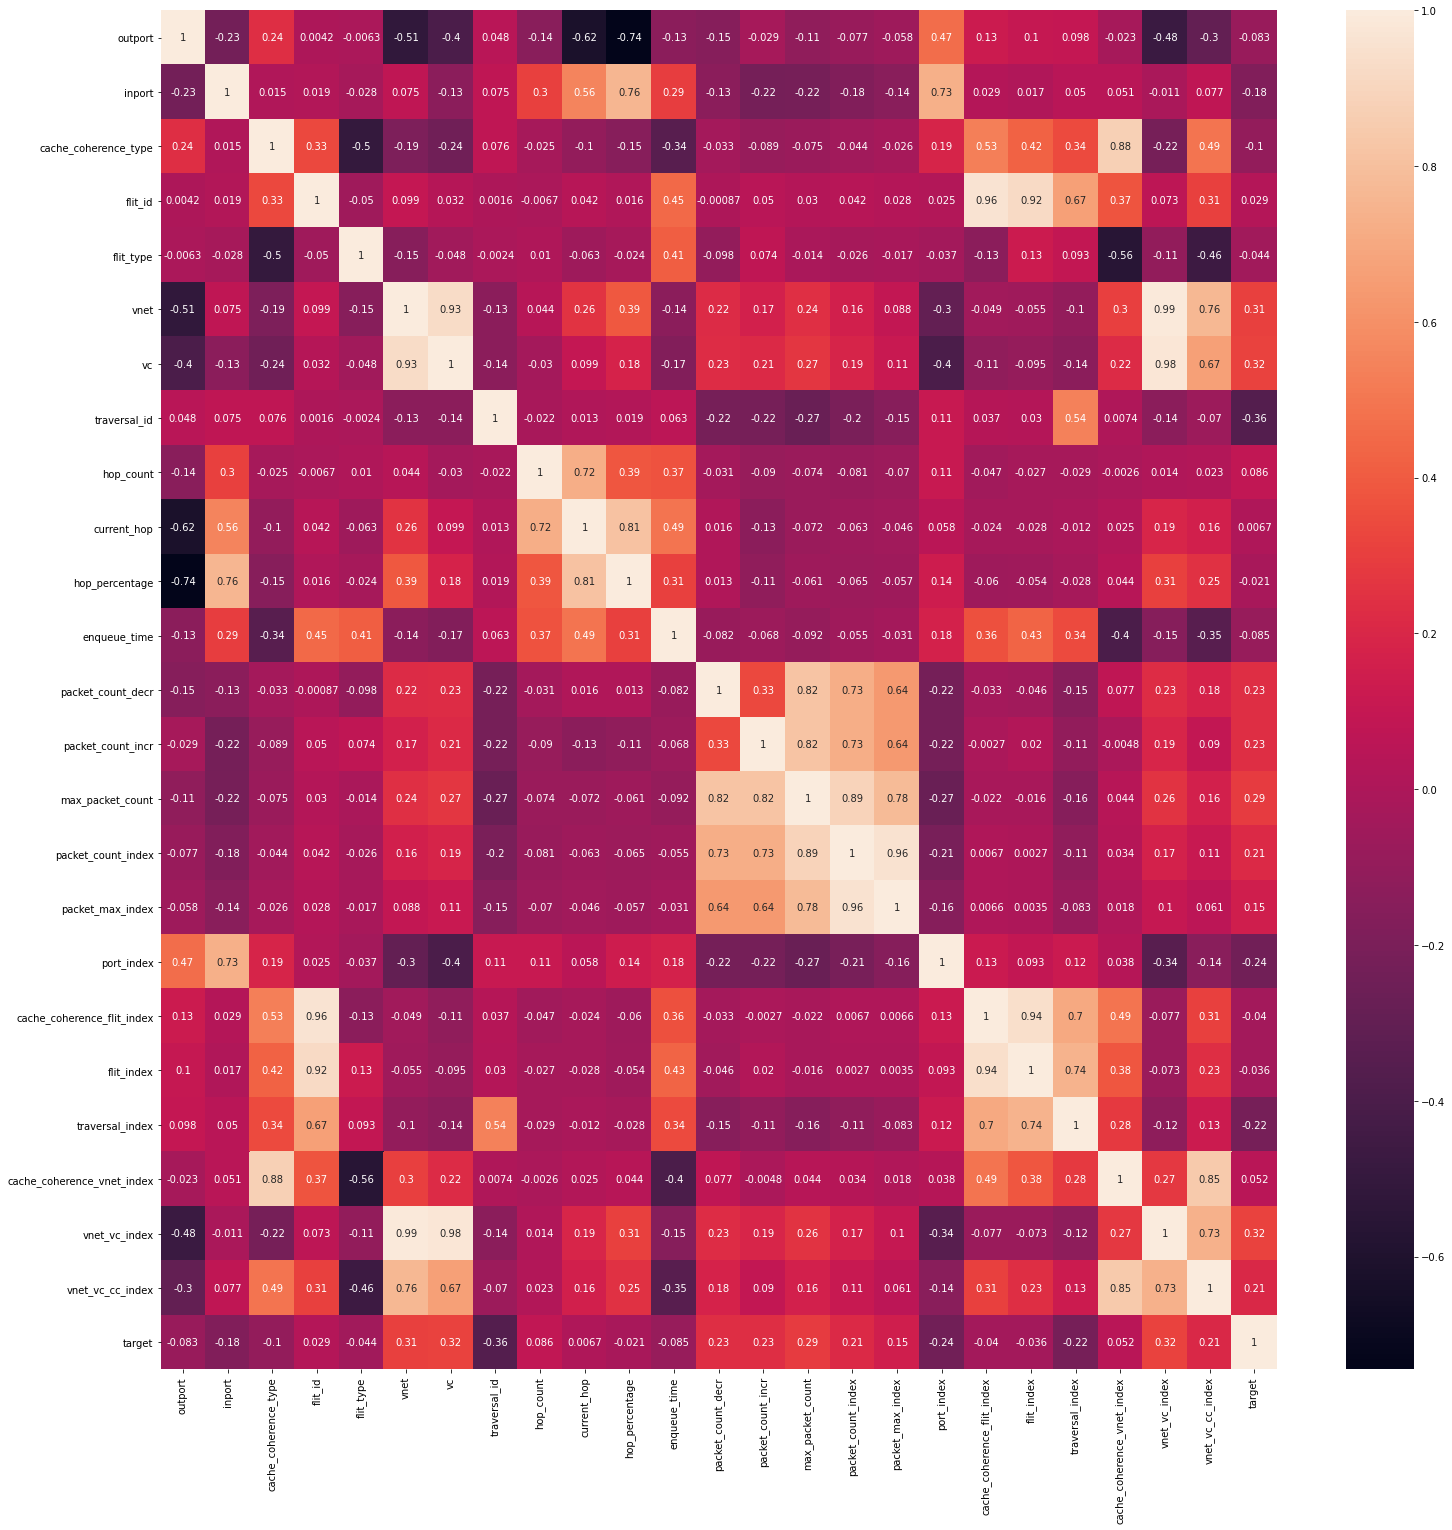

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,0,1,1,4,3,9,2,2,0,0.000000,4,7,1,7,7,49,0,1,4,8,3,27,9
1,3,4,1,1,4,3,9,3,3,1,0.333333,8,1,1,1,1,1,12,1,4,12,3,27,9
2,3,4,1,1,4,3,9,2,5,3,0.600000,16,1,1,1,1,1,12,1,4,8,3,27,9
3,0,3,4,1,1,5,17,2,2,2,1.000000,12,6,2,7,12,84,0,4,4,8,20,85,100
4,0,3,4,2,2,5,17,2,2,2,1.000000,13,5,3,7,15,105,0,8,16,32,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266007,3,0,5,3,2,3,11,20061,1,0,0.000000,18,4,3,6,12,72,0,15,30,601830,15,33,45
266008,3,0,5,4,2,3,11,20061,1,0,0.000000,25,3,4,6,12,72,0,20,40,802440,15,33,45
266009,3,0,5,5,3,3,11,20061,1,0,0.000000,32,2,5,6,10,60,0,25,75,1504575,15,33,45
266010,3,0,1,1,4,3,12,20062,1,0,0.000000,32,1,6,6,6,36,0,1,4,80248,3,36,9


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,0.206897,0.000000,0.206897,0.025105,0.006668,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.166667,0.333333,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.500000,0.600000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.333333,0.333333,1.000000,0.102564,0.172414,0.034483,0.206897,0.046025,0.011529,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
4,0.00,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.000000,0.115385,0.137931,0.068966,0.206897,0.058577,0.014446,0.0,0.241379,0.139535,0.000009,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266007,0.75,0.00,0.666667,0.50,0.333333,0.0,0.250,0.666833,0.166667,0.000000,0.000000,0.179487,0.103448,0.068966,0.172414,0.046025,0.009862,0.0,0.482759,0.302326,0.222290,0.666667,0.103448,0.395604
266008,0.75,0.00,0.666667,0.75,0.333333,0.0,0.250,0.666833,0.166667,0.000000,0.000000,0.269231,0.068966,0.103448,0.172414,0.046025,0.009862,0.0,0.655172,0.418605,0.296388,0.666667,0.103448,0.395604
266009,0.75,0.00,0.666667,1.00,0.666667,0.0,0.250,0.666833,0.166667,0.000000,0.000000,0.358974,0.034483,0.137931,0.172414,0.037657,0.008196,0.0,0.827586,0.825581,0.555730,0.666667,0.103448,0.395604
266010,0.75,0.00,0.000000,0.00,1.000000,0.0,0.375,0.666866,0.166667,0.000000,0.000000,0.358974,0.000000,0.172414,0.172414,0.020921,0.004862,0.0,0.000000,0.000000,0.029638,0.000000,0.155172,0.000000


In [0]:
train_X[train_X.duplicated()].shape

(9798, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.50,0.061538,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.166667,0.50,0.061538,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000003,0.166667,0.000000,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.2,0.166667,0.50,0.061538,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000006,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000400,0.6,0.500000,0.75,0.184615,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000035,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000433,0.6,0.500000,0.75,0.184615,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29183,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.276923,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399956,0.833333,0.000000,0.833333
29184,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.384615,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533299,0.833333,0.000000,0.833333
29185,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.492308,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29186,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.2,0.166667,0.50,0.492308,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.088824,0.166667,0.333333,0.166667


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000003,0.166667,0.333333,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000006,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000400,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000035,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000433,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399956,0.833333,0.000000,0.833333
29216,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.367647,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533299,0.833333,0.000000,0.833333
29217,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29218,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.088824,0.166667,0.333333,0.166667


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000003,0.166667,0.000000,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.2,0.166667,0.50,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000006,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000400,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000035,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000433,0.6,0.500000,0.75,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399956,0.833333,0.000000,0.833333
29216,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.367647,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533299,0.833333,0.000000,0.833333
29217,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
29218,0.75,1.0,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.2,0.166667,0.50,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.088824,0.166667,0.333333,0.166667


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(22, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.500000,0.6,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000300,0.8,0.500000,0.6,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000
2,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000632,0.8,0.500000,0.6,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000699,0.2,0.166667,0.5,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000067,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000765,0.2,0.166667,0.5,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000072,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35939,0.75,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.8,0.500000,0.6,0.279412,0.0,0.0,0.0,0.0,0.0,1.0,0.310345,0.186047,0.222234,0.666667,0.000000,0.666667
35940,0.75,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.8,0.500000,0.6,0.382353,0.0,0.0,0.0,0.0,0.0,1.0,0.482759,0.302326,0.333353,0.666667,0.000000,0.666667
35941,0.75,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.8,0.500000,0.6,0.485294,0.0,0.0,0.0,0.0,0.0,1.0,0.655172,0.418605,0.444472,0.666667,0.000000,0.666667
35942,0.75,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.8,0.500000,0.6,0.588235,0.0,0.0,0.0,0.0,0.0,1.0,0.827586,0.825581,0.833388,0.666667,0.000000,0.666667


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(31, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.5,0.117647,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.6,0.333333,0.5,0.117647,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
2,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000599,0.6,0.333333,0.5,0.117647,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000732,0.2,0.166667,0.5,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000069,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000765,0.2,0.166667,0.5,0.058824,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000072,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35951,0.75,1.0,0.833333,0.25,0.333333,0.0,0.000000,0.999933,0.2,0.166667,0.5,0.161765,0.0,0.0,0.0,0.0,0.0,1.0,0.379310,0.232558,0.266663,0.833333,0.000000,0.833333
35952,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999933,0.2,0.166667,0.5,0.264706,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399997,0.833333,0.000000,0.833333
35953,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999933,0.2,0.166667,0.5,0.367647,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533331,0.833333,0.000000,0.833333
35954,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999933,0.2,0.166667,0.5,0.470588,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(12, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.333333,0.000000,0.0,0.000000,0.151515,0.000000,0.151515,0.016393,0.003364,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.125000,0.121212,0.030303,0.151515,0.029508,0.005671,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.00,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.140625,0.090909,0.060606,0.151515,0.036066,0.006825,0.0,0.241379,0.139535,0.000013,0.944444,1.000000,1.000000
3,0.00,0.75,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.156250,0.060606,0.090909,0.151515,0.036066,0.006825,0.0,0.379310,0.232558,0.000022,0.944444,1.000000,1.000000
4,0.00,0.75,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.171875,0.030303,0.121212,0.151515,0.029508,0.005671,0.0,0.517241,0.325581,0.000031,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88824,1.00,0.00,0.666667,0.25,0.333333,0.0,0.250,0.999967,0.500000,0.000000,0.0,0.109375,0.121212,0.181818,0.303030,0.111475,0.036912,0.0,0.310345,0.186047,0.222278,0.666667,0.103448,0.395604
88825,1.00,0.00,0.666667,0.50,0.333333,0.0,0.250,0.999967,0.500000,0.000000,0.0,0.218750,0.090909,0.212121,0.303030,0.101639,0.033740,0.0,0.482759,0.302326,0.333419,0.666667,0.103448,0.395604
88826,1.00,0.00,0.666667,0.75,0.333333,0.0,0.250,0.999967,0.500000,0.000000,0.0,0.328125,0.060606,0.242424,0.303030,0.085246,0.028453,0.0,0.655172,0.418605,0.444560,0.666667,0.103448,0.395604
88827,1.00,0.00,0.666667,1.00,0.666667,0.0,0.250,0.999967,0.500000,0.000000,0.0,0.437500,0.030303,0.272727,0.303030,0.062295,0.021052,0.0,0.827586,0.825581,0.833554,0.666667,0.103448,0.395604


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.166667,0.500000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000000,0.166667,0.000000,0.166667
1,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000050,0.2,0.166667,0.500000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000004,0.166667,0.000000,0.166667
2,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000349,0.6,0.500000,0.750000,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000031,0.166667,0.000000,0.166667
3,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000449,0.6,0.500000,0.750000,0.214286,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000040,0.166667,0.000000,0.166667
4,0.75,1.0,0.166667,0.00,1.000000,0.0,0.000000,0.000549,0.4,0.333333,0.666667,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000049,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,0.75,1.0,0.833333,0.25,0.333333,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.196429,0.0,0.0,0.0,0.0,0.0,1.0,0.379310,0.232558,0.266611,0.833333,0.000000,0.833333
18788,0.75,1.0,0.833333,0.50,0.333333,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.321429,0.0,0.0,0.0,0.0,0.0,1.0,0.586207,0.372093,0.399955,0.833333,0.000000,0.833333
18789,0.75,1.0,0.833333,0.75,0.333333,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.446429,0.0,0.0,0.0,0.0,0.0,1.0,0.793103,0.511628,0.533298,0.833333,0.000000,0.833333
18790,0.75,1.0,0.833333,1.00,0.666667,0.0,0.000000,0.999950,0.2,0.166667,0.500000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

1    142428
0    123584
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                   Specs         Score
5                   vnet  18368.426502
22         vnet_vc_index  14589.566738
6                     vc  11391.332662
17            port_index   6604.689150
14      max_packet_count   5061.324167
7           traversal_id   4185.766977
13     packet_count_incr   2538.574311
12     packet_count_decr   2522.755548
20       traversal_index   1901.266115
1                 inport   1805.679546
15    packet_count_index   1520.978716
23      vnet_vc_cc_index   1130.330203
16      packet_max_index    626.880010
0                outport    339.757656
2   cache_coherence_type    234.842157
8              hop_count    202.806593
11          enqueue_time    154.057311


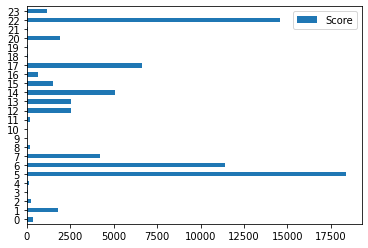

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 70.74136902104703
Test Prediction  70.77796364866643


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  42.723036864464845


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  42.580424366872


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  43.23750855578371


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  40.418428666815046


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  42.337857381243744


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  25.442141642931926


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  55.15112813963389


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
5,vnet,5.793029
3,flit_id,4.298736
23,vnet_vc_cc_index,2.969666
22,vnet_vc_index,2.668211
10,hop_percentage,2.083298
8,hop_count,1.886834
15,packet_count_index,1.770538
14,max_packet_count,1.702395
12,packet_count_decr,0.862412
13,packet_count_incr,0.839983


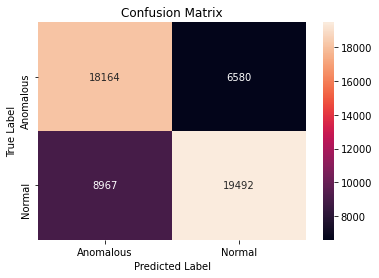

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70     24744
           1       0.75      0.68      0.71     28459

    accuracy                           0.71     53203
   macro avg       0.71      0.71      0.71     53203
weighted avg       0.71      0.71      0.71     53203



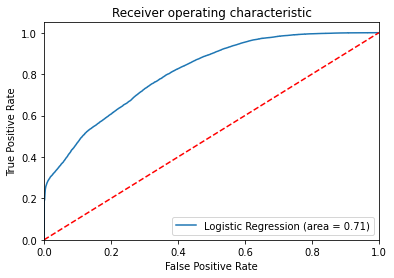

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

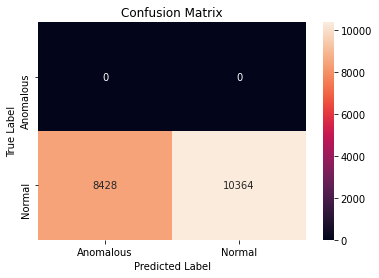

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71     18792

    accuracy                           0.55     18792
   macro avg       0.50      0.28      0.36     18792
weighted avg       1.00      0.55      0.71     18792



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 88.26788340718673
Test Prediction  81.25669605097457


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.96135398108811


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  79.26762491444215


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  84.02121834360028


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  66.15568662363677


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  80.83490933363


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  12.252755293879252


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  19.471051511281395


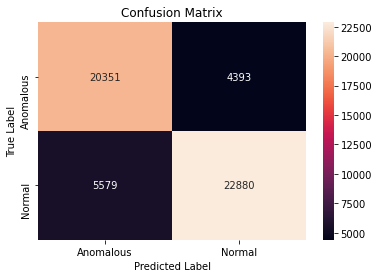

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     24744
           1       0.84      0.80      0.82     28459

    accuracy                           0.81     53203
   macro avg       0.81      0.81      0.81     53203
weighted avg       0.81      0.81      0.81     53203



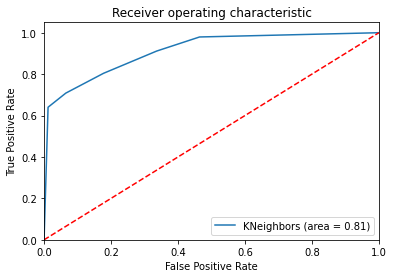

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

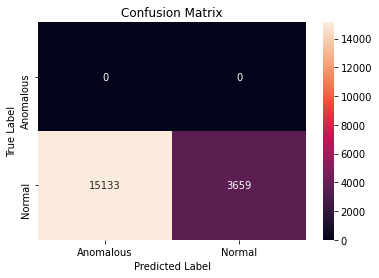

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.19      0.33     18792

    accuracy                           0.19     18792
   macro avg       0.50      0.10      0.16     18792
weighted avg       1.00      0.19      0.33     18792



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 59.738074987430046
Test Prediction Score 59.69212262466402


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 64.62587364670412


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  64.61327857631758


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  64.04175222450377


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  67.02926774983308


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  67.07642674379798


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  55.345664141215146


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  31.98701575138357


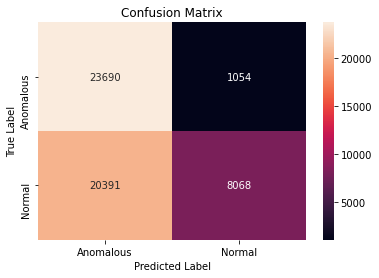

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.54      0.96      0.69     24744
           1       0.88      0.28      0.43     28459

    accuracy                           0.60     53203
   macro avg       0.71      0.62      0.56     53203
weighted avg       0.72      0.60      0.55     53203



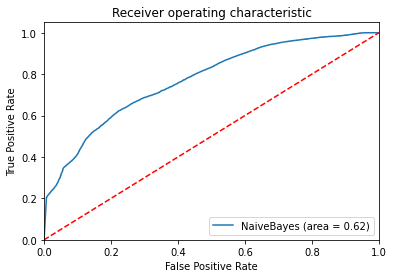

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 170247 samples, validate on 42562 samples
Epoch 1/10
170247/170247 [==============================] - 6s 37us/step - loss: 0.1937 - accuracy: 0.6933 - val_loss: 0.1718 - val_accuracy: 0.7259
Epoch 2/10
170247/170247 [==============================] - 6s 36us/step - loss: 0.1666 - accuracy: 0.7286 - val_loss: 0.1640 - val_accuracy: 0.7293
Epoch 3/10
170247/170247 [==============================] - 6s 36us/step - loss: 0.1628 - accuracy: 0.7295 - val_loss: 0.1622 - val_accuracy: 0.7296
Epoch 4/10
170247/170247 [==============================] - 6s 36us/step - loss: 0.1615 - accuracy: 0.7294 - val_loss: 0.1611 - val_accuracy: 0.7294
Epoch 5/10
170247/170247 [==============================] - 6s 35us/step - loss: 0.1607 - accuracy: 0.7299 - val_loss: 0.1604 - val_accuracy: 0.7301
Epoch 6/10
170247/170247 [==============================] - 6s 35us/step - loss: 0.1602 - accuracy: 0.7302 - val_loss: 0.1606 - val_accuracy: 0.7301
Epoch 7/10
170247/170247 [=============================

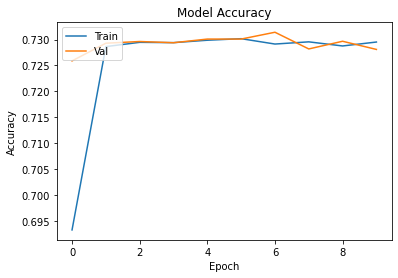

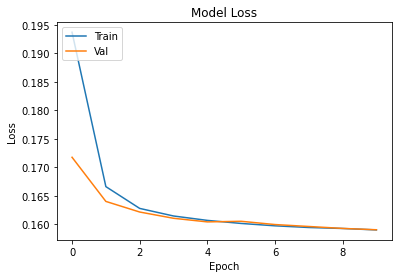

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.92%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.48%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.88%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.60%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.22%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.90%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 12.81%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 9.45%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 170247 samples, validate on 42562 samples
Epoch 1/30
170247/170247 [==============================] - 6s 36us/step - loss: 0.2125 - accuracy: 0.6820 - val_loss: 0.1901 - val_accuracy: 0.7109
Epoch 2/30
170247/170247 [==============================] - 6s 36us/step - loss: 0.1815 - accuracy: 0.7234 - val_loss: 0.1784 - val_accuracy: 0.7240
Epoch 3/30
170247/170247 [==============================] - 6s 35us/step - loss: 0.1714 - accuracy: 0.7298 - val_loss: 0.1674 - val_accuracy: 0.7277
Epoch 4/30
170247/170247 [==============================] - 6s 36us/step - loss: 0.1625 - accuracy: 0.7317 - val_loss: 0.1603 - val_accuracy: 0.7279
Epoch 5/30
170247/170247 [==============================] - 6s 36us/step - loss: 0.1578 - accuracy: 0.7324 - val_loss: 0.1581 - val_accuracy: 0.7264
Epoch 6/30
170247/170247 [==============================] - 6s 36us/step - loss: 0.1554 - accuracy: 0.7326 - val_loss: 0.1549 - val_accuracy: 0.7302
Epoch 7/30
170247/170247 [=============================

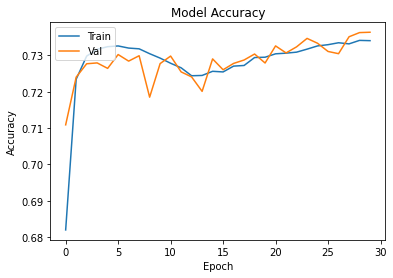

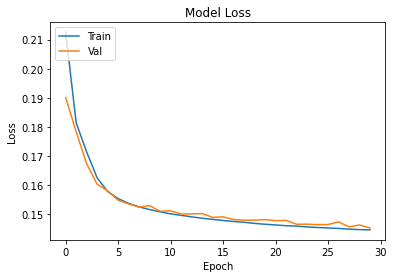

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.00%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 90.00%
accuracy: 90.47%
accuracy: 90.40%
accuracy: 80.22%
accuracy: 85.43%
accuracy: 20.10%
accuracy: 11.16%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 170247 samples, validate on 42562 samples
Epoch 1/30
170247/170247 [==============================] - 6s 37us/step - loss: 0.2487 - accuracy: 0.5361 - val_loss: 0.2486 - val_accuracy: 0.5331
Epoch 2/30
170247/170247 [==============================] - 6s 37us/step - loss: 0.2482 - accuracy: 0.5362 - val_loss: 0.2483 - val_accuracy: 0.5331
Epoch 3/30
170247/170247 [==============================] - 6s 37us/step - loss: 0.2475 - accuracy: 0.5364 - val_loss: 0.2460 - val_accuracy: 0.5337
Epoch 4/30
170247/170247 [==============================] - 6s 37us/step - loss: 0.2372 - accuracy: 0.5829 - val_loss: 0.2298 - val_accuracy: 0.6118
Epoch 5/30
170247/170247 [==============================] - 6s 36us/step - loss: 0.1961 - accuracy: 0.7004 - val_loss: 0.1747 - val_accuracy: 0.7335
Epoch 6/30
170247/170247 [==============================] - 6s 37us/step - loss: 0.1671 - accuracy: 0.7390 - val_loss: 0.1626 - val_accuracy: 0.7390
Epoch 7/30
170247/170247 [=============================

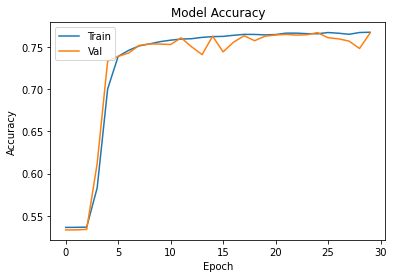

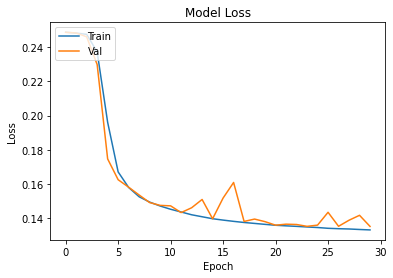

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.27%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.93%
accuracy: 49.11%
accuracy: 53.54%
accuracy: 42.75%
accuracy: 51.23%
accuracy: 11.16%
accuracy: 46.38%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 170247 samples, validate on 42562 samples
Epoch 1/100
170247/170247 [==============================] - 12s 71us/step - loss: 0.1491 - accuracy: 0.7386 - val_loss: 0.1394 - val_accuracy: 0.7454
Epoch 2/100
170247/170247 [==============================] - 12s 68us/step - loss: 0.1383 - accuracy: 0.7548 - val_loss: 0.1352 - val_accuracy: 0.7538
Epoch 3/100
170247/170247 [==============================] - 12s 70us/step - loss: 0.1350 - accuracy: 0.7620 - val_loss: 0.1291 - val_accuracy: 0.7750
Epoch 4/100
170247/170247 [==============================] - 12s 68us/step - loss: 0.1328 - accuracy: 0.7663 - val_loss: 0.1304 - val_accuracy: 0.7649
Epoch 5/100
170247/170247 [==============================] - 11s 67us/step - loss: 0.1316 - accuracy: 0.7683 - val_loss: 0.1277 - val_accuracy: 0.7778
Epoch 6/100
170247/170247 [==============================] - 12s 69us/step - loss: 0.1310 - accuracy: 0.7707 - val_loss: 0.1266 - val_accuracy: 0.7754
Epoch 7/100
170247/170247 [================

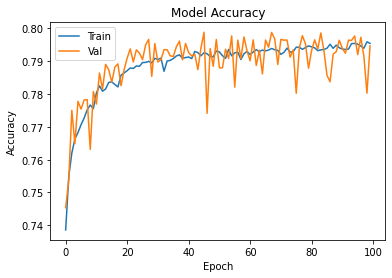

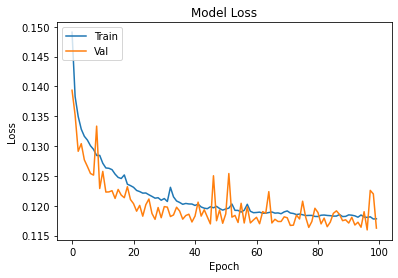

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.65%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.72%
accuracy: 74.44%
accuracy: 77.55%
accuracy: 69.06%
accuracy: 73.84%
accuracy: 10.93%
accuracy: 16.84%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 170247 samples, validate on 42562 samples
Epoch 1/50
170247/170247 [==============================] - 12s 73us/step - loss: 0.1488 - accuracy: 0.7439 - val_loss: 0.1345 - val_accuracy: 0.7629
Epoch 2/50
170247/170247 [==============================] - 12s 68us/step - loss: 0.1386 - accuracy: 0.7585 - val_loss: 0.1462 - val_accuracy: 0.7430
Epoch 3/50
170247/170247 [==============================] - 12s 71us/step - loss: 0.1362 - accuracy: 0.7637 - val_loss: 0.1290 - val_accuracy: 0.7778
Epoch 4/50
170247/170247 [==============================] - 14s 85us/step - loss: 0.1340 - accuracy: 0.7692 - val_loss: 0.1314 - val_accuracy: 0.7754
Epoch 5/50
170247/170247 [==============================] - 12s 71us/step - loss: 0.1324 - accuracy: 0.7716 - val_loss: 0.1271 - val_accuracy: 0.7792
Epoch 6/50
170247/170247 [==============================] - 12s 71us/step - loss: 0.1311 - accuracy: 0.7730 - val_loss: 0.1284 - val_accuracy: 0.7745
Epoch 7/50
170247/170247 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.29%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.36%
accuracy: 65.88%
accuracy: 67.55%
accuracy: 60.12%
accuracy: 62.39%
accuracy: 6.93%
accuracy: 28.57%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 90.33123599095903
Test Prediction Score 87.73565400447343


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 70.55296697272851
Test Prediction Score 69.91444216290212
Test Prediction Score 72.0362765229295
Test Prediction Score 69.22991319830848
Test Prediction Score 73.38413616642563
Test Prediction Score 42.6932645870155
Test Prediction Score 30.081949765857814


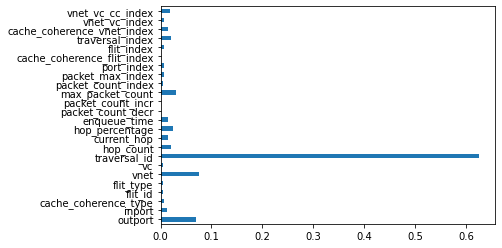

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

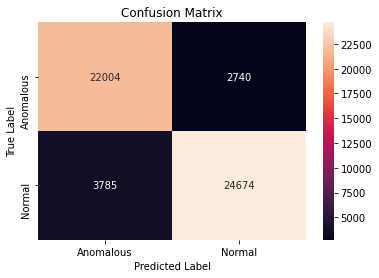

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     24744
           1       0.90      0.87      0.88     28459

    accuracy                           0.88     53203
   macro avg       0.88      0.88      0.88     53203
weighted avg       0.88      0.88      0.88     53203



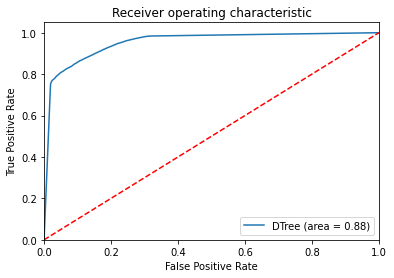

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 94.9865842140135
Test Prediction Score 90.57383982106272


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 58.589146224475805
Test Prediction Score 57.7378507871321
Test Prediction Score 59.92470910335387
Test Prediction Score 54.50979301135099
Test Prediction Score 61.500166870619644
Test Prediction Score 42.68988731157617
Test Prediction Score 41.25691783737761


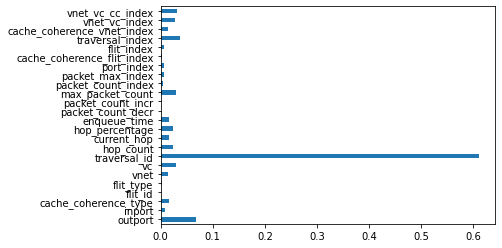

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

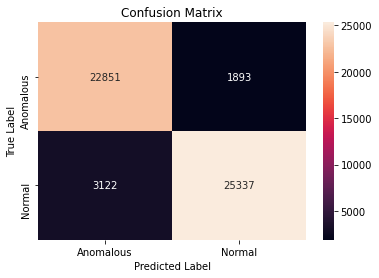

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     24744
           1       0.93      0.89      0.91     28459

    accuracy                           0.91     53203
   macro avg       0.91      0.91      0.91     53203
weighted avg       0.91      0.91      0.91     53203



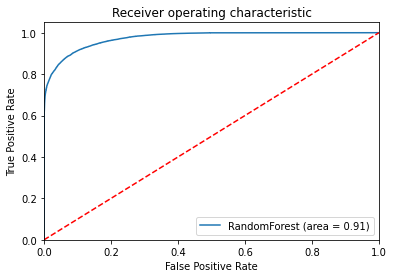

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [123]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [125]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.65936121122697
Test Prediction Score 93.84245249328046


In [126]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 72.68055365218584
Test Prediction Score 72.0362765229295
Test Prediction Score 73.89117043121149
Test Prediction Score 65.68829290006677
Test Prediction Score 73.96262098119925
Test Prediction Score 42.00317463891297
Test Prediction Score 28.00659855257556


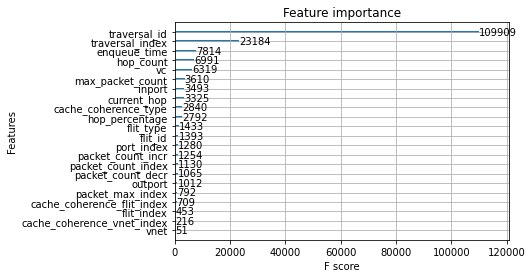

In [127]:
plot_importance(xgbc)
plt.show()

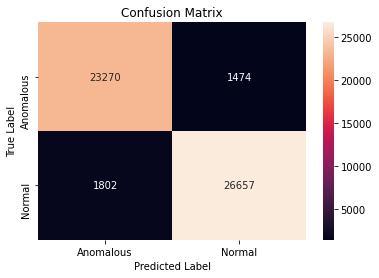

In [128]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [129]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     24744
           1       0.95      0.94      0.94     28459

    accuracy                           0.94     53203
   macro avg       0.94      0.94      0.94     53203
weighted avg       0.94      0.94      0.94     53203



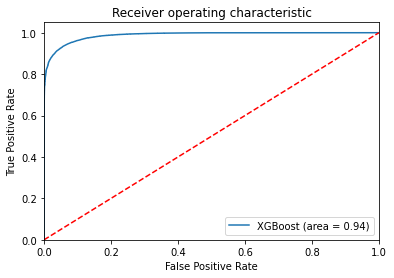

In [130]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [132]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [134]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.14767232588846
Test Prediction Score 85.14181531116667


In [135]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 77.18925585857201
Test Prediction Score 75.59206023271732
Test Prediction Score 78.09719370294319
Test Prediction Score 67.61907411529046
Test Prediction Score 79.88096562465236
Test Prediction Score 25.386979477422916
Test Prediction Score 24.840357598978287


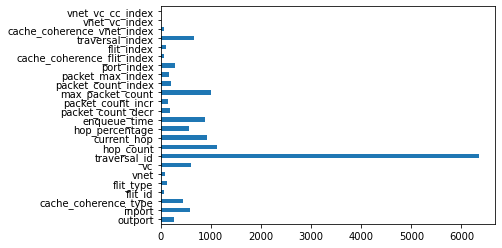

In [136]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

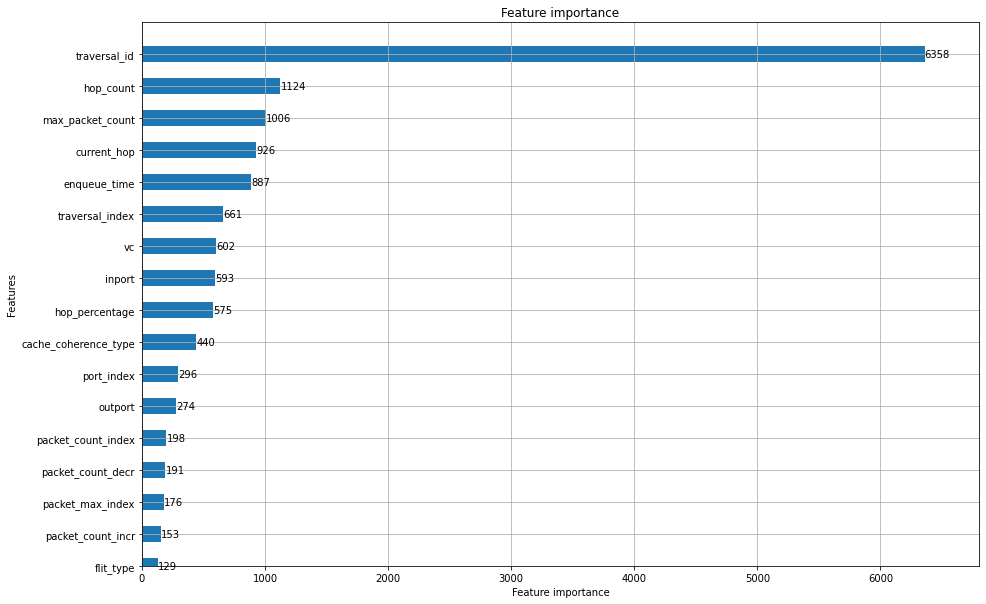

In [137]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [138]:
sorted(gbm.feature_importances_,reverse=True)

[6358,
 1124,
 1006,
 926,
 887,
 661,
 602,
 593,
 575,
 440,
 296,
 274,
 198,
 191,
 176,
 153,
 129,
 114,
 89,
 72,
 70,
 65,
 1,
 0]

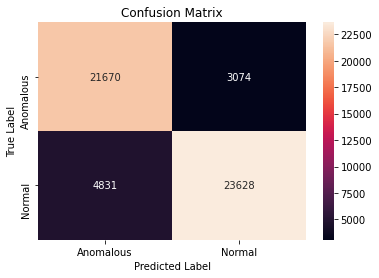

In [139]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     24744
           1       0.88      0.83      0.86     28459

    accuracy                           0.85     53203
   macro avg       0.85      0.85      0.85     53203
weighted avg       0.85      0.85      0.85     53203



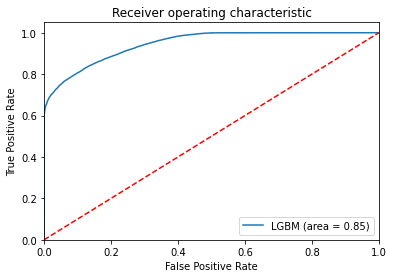

In [141]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()